# Notebook Integration with GCP Services

### Import libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()

### Integration with Google Cloud Storage

In [44]:
df = pd.read_csv('gs://crazy-hippo-01/dataset/census_train.csv')

In [45]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


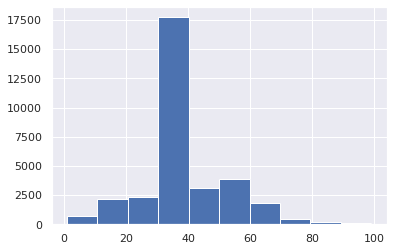

In [46]:
df['hours_per_week'].hist();

### Integration with BigQuery

In [49]:
%%bigquery df_from_bq
SELECT *
FROM `crazy-hippo-01.earnings_ml.census_data`


In [50]:
df_from_bq.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,65,?,293385,Preschool,1,Married-civ-spouse,?,Husband,Black,Male,0,0,30,United-States,<=50K
1,64,?,140237,Preschool,1,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
2,52,?,248113,Preschool,1,Married-spouse-absent,?,Other-relative,White,Male,0,0,40,Mexico,<=50K
3,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
4,39,?,362685,Preschool,1,Widowed,?,Not-in-family,White,Female,0,0,20,El-Salvador,<=50K


In [35]:
df_from_bq.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,10.000000,10.000000,10.0,10.0,10.0,10.000000
mean,51.500000,267669.700000,1.0,0.0,0.0,32.500000
std,12.545473,134917.348298,0.0,0.0,0.0,10.865337
min,34.000000,140237.000000,1.0,0.0,0.0,10.000000
25%,40.500000,157059.750000,1.0,0.0,0.0,26.250000
50%,53.000000,241596.000000,1.0,0.0,0.0,40.000000
75%,61.500000,335351.250000,1.0,0.0,0.0,40.000000
max,71.000000,572751.000000,1.0,0.0,0.0,40.000000


In [36]:
df_from_bq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10 non-null     int64 
 1   workclass       10 non-null     object
 2   fnlwgt          10 non-null     int64 
 3   education       10 non-null     object
 4   education_num   10 non-null     int64 
 5   marital_status  10 non-null     object
 6   occupation      10 non-null     object
 7   relationship    10 non-null     object
 8   race            10 non-null     object
 9   sex             10 non-null     object
 10  capital_gain    10 non-null     int64 
 11  capital_loss    10 non-null     int64 
 12  hours_per_week  10 non-null     int64 
 13  native_country  10 non-null     object
 14  income          10 non-null     object
dtypes: int64(6), object(9)
memory usage: 1.3+ KB


### Running Queries on BigQuery Data

In [51]:
%%bigquery group_by_age
SELECT age, sex, income 
FROM `crazy-hippo-01.earnings_ml.census_data` 
WHERE age >=30 AND age <= 50

In [52]:
group_by_age.head()

,age,sex,income
0,39,Female,<=50K
1,40,Male,<=50K
2,34,Female,<=50K
3,42,Male,<=50K
4,40,Male,<=50K


In [39]:
group_by_age.groupby('sex').count()

,age,income
sex,,
Female,4870,4870
Male,11464,11464


In [40]:
len(group_by_age)

16334

In [41]:
male_vs_women = group_by_age[group_by_age['income'] == ' >50K'].groupby(group_by_age['sex']).count()['income']

<AxesSubplot:xlabel='sex'>

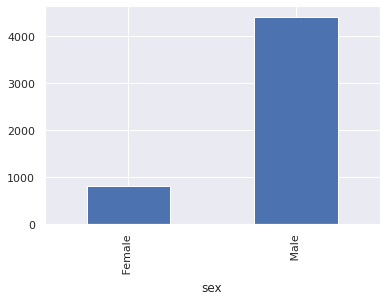

In [42]:
male_vs_women.plot.bar()